In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier

2018-05-08 22:03:58,954 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_batch = train_data[0:100000]
test_batch = test_data[0:50000]

In [4]:
sentences = []
for review in train_batch.text:
    sentences.append(review.split())

In [5]:
%%time
wv_model = Word2Vec(sentences, workers = 4)

2018-05-08 22:06:24,700 : INFO : collecting all words and their counts
2018-05-08 22:06:24,705 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-08 22:06:24,937 : INFO : PROGRESS: at sentence #10000, processed 1149263 words, keeping 73895 word types
2018-05-08 22:06:25,169 : INFO : PROGRESS: at sentence #20000, processed 2280853 words, keeping 113523 word types
2018-05-08 22:06:25,386 : INFO : PROGRESS: at sentence #30000, processed 3412546 words, keeping 145823 word types
2018-05-08 22:06:25,615 : INFO : PROGRESS: at sentence #40000, processed 4558235 words, keeping 175563 word types
2018-05-08 22:06:25,883 : INFO : PROGRESS: at sentence #50000, processed 5696037 words, keeping 202365 word types
2018-05-08 22:06:26,124 : INFO : PROGRESS: at sentence #60000, processed 6810830 words, keeping 226463 word types
2018-05-08 22:06:26,363 : INFO : PROGRESS: at sentence #70000, processed 7944539 words, keeping 249569 word types
2018-05-08 22:06:26,601 : INFO : 

2018-05-08 22:07:07,940 : INFO : EPOCH 5 - PROGRESS: at 57.73% examples, 982757 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:07:08,945 : INFO : EPOCH 5 - PROGRESS: at 69.35% examples, 983678 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:07:09,951 : INFO : EPOCH 5 - PROGRESS: at 81.36% examples, 989484 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:07:10,951 : INFO : EPOCH 5 - PROGRESS: at 92.80% examples, 987978 words/s, in_qsize 7, out_qsize 0
2018-05-08 22:07:11,535 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-05-08 22:07:11,542 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-05-08 22:07:11,551 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-05-08 22:07:11,552 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-08 22:07:11,553 : INFO : EPOCH - 5 : training on 11344089 raw words (8558416 effective words) took 8.6s, 990017 effective words/s
2018-05-08 22:07:11,553 : INFO : training on a

CPU times: user 2min 39s, sys: 638 ms, total: 2min 40s
Wall time: 46.9 s


In [6]:
len(wv_model.wv.vocab)

55236

In [11]:
wv_model.wv['food']

array([ 1.6760770e+00,  1.0607835e+00,  2.9874304e-01, -4.6076241e+00,
        1.8369666e-01,  9.5607209e-01,  1.6746558e+00, -1.6334783e+00,
       -3.7492785e+00, -1.5843943e-01, -3.8089252e-01,  1.2508904e+00,
       -3.0607586e+00,  2.4589068e-01, -1.7681792e+00,  1.8877894e+00,
        8.3141714e-01,  2.1892564e+00,  1.8509336e+00, -9.8419398e-01,
       -2.8930659e+00, -1.9479727e+00,  6.7294669e-01,  3.1233156e+00,
       -1.3798598e+00, -1.8254275e+00, -1.7428943e+00,  2.2089169e+00,
        1.5835268e+00,  1.8263876e+00,  5.2711182e+00, -1.5371783e+00,
       -2.5235059e+00, -2.2317121e+00,  1.6947410e+00, -1.1412269e+00,
       -6.4739597e-01, -9.4944382e-01, -8.3285660e-01, -2.4834766e+00,
        2.0850956e+00, -1.0657881e+00, -2.7876773e+00,  3.2640779e+00,
       -3.3065960e-01, -2.0518794e+00, -1.9303493e+00,  5.1924521e-01,
       -2.7129269e+00, -8.5118663e-01, -1.4147160e+00, -1.2977853e+00,
        5.7376337e-01, -1.5103277e+00,  2.3871324e+00, -2.9553978e+00,
      

In [12]:
def build_sentences_vector(sentence):
    words = sentence.split()
    result = np.zeros(100)
    size = 0
    for word in words:
        if word in wv_model.wv.vocab:
            result+=wv_model.wv[word]
            size+=1
    if size == 0:
        size = 1
    result /= size
    return result

In [13]:
train_data_features = []
for sentense in train_batch.text:    
    train_data_features.append(build_sentences_vector(sentense))

In [14]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=3, C=1e5)
logreg = logreg.fit(train_data_features, train_batch.stars)

/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(self.n_jobs))


CPU times: user 19.2 s, sys: 59.7 ms, total: 19.2 s
Wall time: 19.2 s


In [15]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy                     %s' % accuracy_score(target, predictions))
    print('explained_variance_score     %s' % explained_variance_score(target, predictions))
    print('mean_absolute_error          %s' % mean_absolute_error(target, predictions))
    print('mean_squared_error           %s' % mean_squared_error(target, predictions))
    print('mean_squared_log_error       %s' % mean_squared_log_error(target, predictions))
    print('r2_score                     %s' % r2_score(target, predictions))
    print()
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(train_batch.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')
    
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [16]:
%%time
test_batch_transform = []
for sentense in test_batch.text:    
    test_batch_transform.append(build_sentences_vector(sentense))
predicted = logreg.predict(test_batch_transform)

CPU times: user 24.1 s, sys: 128 ms, total: 24.2 s
Wall time: 24.4 s


accuracy                     0.60162
explained_variance_score     0.4344865482913238
mean_absolute_error          0.5952
mean_squared_error           1.19884
mean_squared_log_error       0.08385478973972361
r2_score                     0.41209555987826596

confusion matrix
 [[ 5337   150   242   331   814]
 [ 1570   229   709   908   640]
 [  720   162  1144  2757  1139]
 [  391    51   493  4914  5859]
 [  475    21   148  2339 18457]]
(row=expected, col=predicted)


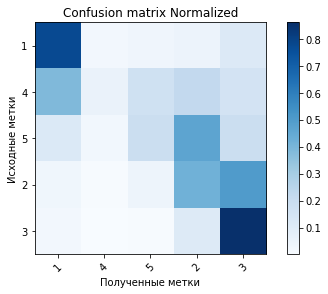

In [17]:
evaluate_prediction(predicted, test_batch.stars)

In [ ]:
wv